# Notebook to do exploratory Data Analysis

In [13]:
import pandas as pd
import numpy as np
from math import sqrt

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew

from sklearn.linear_model    import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import RidgeCV
from sklearn.pipeline        import make_pipeline
from sklearn.preprocessing   import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.preprocessing   import StandardScaler
from sklearn.metrics         import mean_squared_error
from sklearn.linear_model    import Lasso
from sklearn                 import linear_model

(array([ 8., 16., 14., 32., 44., 38., 56., 60., 47., 42., 32., 33., 31.,
        22., 16., 12.,  5.,  6.,  2.,  1.,  3.,  1.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  1.]),
 array([11.12      , 11.23833333, 11.35666667, 11.475     , 11.59333333,
        11.71166667, 11.83      , 11.94833333, 12.06666667, 12.185     ,
        12.30333333, 12.42166667, 12.54      , 12.65833333, 12.77666667,
        12.895     , 13.01333333, 13.13166667, 13.25      , 13.36833333,
        13.48666667, 13.605     , 13.72333333, 13.84166667, 13.96      ,
        14.07833333, 14.19666667, 14.315     , 14.43333333, 14.55166667,
        14.67      ]),
 <BarContainer object of 30 artists>)

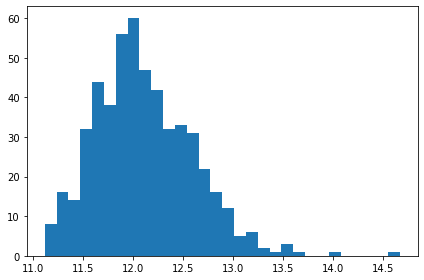

In [16]:
women100 = pd.read_csv("100_Women_Results.csv")
d = women100['Fr_PR']
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)
axs.hist(d, bins=30)

(array([ 6., 13.,  9., 25., 26., 38., 37., 55., 49., 41., 54., 38., 34.,
        28., 18., 12., 15.,  4., 11.,  1.,  1.,  3.,  2.,  2.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([10.86      , 10.97766667, 11.09533333, 11.213     , 11.33066667,
        11.44833333, 11.566     , 11.68366667, 11.80133333, 11.919     ,
        12.03666667, 12.15433333, 12.272     , 12.38966667, 12.50733333,
        12.625     , 12.74266667, 12.86033333, 12.978     , 13.09566667,
        13.21333333, 13.331     , 13.44866667, 13.56633333, 13.684     ,
        13.80166667, 13.91933333, 14.037     , 14.15466667, 14.27233333,
        14.39      ]),
 <BarContainer object of 30 artists>)

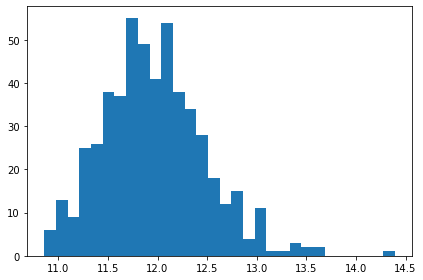

In [15]:
women100 = pd.read_csv("100_Women_Results.csv")
d = women100['Sr_PR']
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)
axs.hist(d, bins=30)

(array([13., 26., 57., 80., 66., 70., 43., 28., 16.,  5.,  1.,  2.,  1.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([10.03 , 10.224, 10.418, 10.612, 10.806, 11.   , 11.194, 11.388,
        11.582, 11.776, 11.97 , 12.164, 12.358, 12.552, 12.746, 12.94 ,
        13.134, 13.328, 13.522, 13.716, 13.91 , 14.104, 14.298, 14.492,
        14.686, 14.88 , 15.074, 15.268, 15.462, 15.656, 15.85 ]),
 <BarContainer object of 30 artists>)

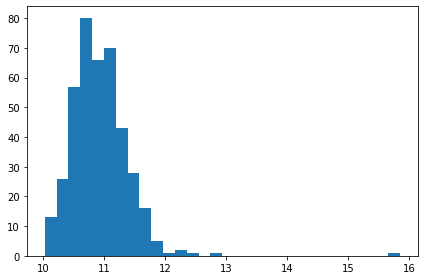

In [18]:
m100 = pd.read_csv("100_Men_Results.csv")
d = m100['Fr_PR']
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)
axs.hist(d, bins=30)

(array([ 6., 13., 13., 14., 13., 28., 31., 43., 29., 40., 40., 31., 24.,
        27., 17., 14.,  7., 11.,  3.,  3.,  1.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([ 9.89      ,  9.98666667, 10.08333333, 10.18      , 10.27666667,
        10.37333333, 10.47      , 10.56666667, 10.66333333, 10.76      ,
        10.85666667, 10.95333333, 11.05      , 11.14666667, 11.24333333,
        11.34      , 11.43666667, 11.53333333, 11.63      , 11.72666667,
        11.82333333, 11.92      , 12.01666667, 12.11333333, 12.21      ,
        12.30666667, 12.40333333, 12.5       , 12.59666667, 12.69333333,
        12.79      ]),
 <BarContainer object of 30 artists>)

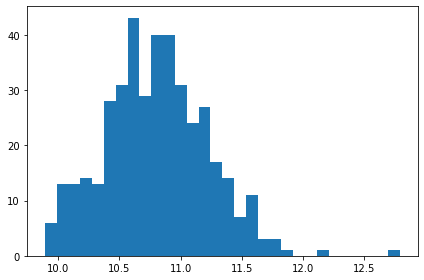

In [19]:
m100 = pd.read_csv("100_Men_Results.csv")
d = m100['Sr_PR']
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)
axs.hist(d, bins=30)

(array([ 1.,  6.,  3., 10., 15., 25., 34., 22., 23., 40., 37., 26., 21.,
        22., 25., 12., 15.,  5.,  6.,  5.,  1.,  2.,  2.,  2.,  1.,  0.,
         2.,  2.,  1.,  1.]),
 array([ 924.74      ,  938.42266667,  952.10533333,  965.788     ,
         979.47066667,  993.15333333, 1006.836     , 1020.51866667,
        1034.20133333, 1047.884     , 1061.56666667, 1075.24933333,
        1088.932     , 1102.61466667, 1116.29733333, 1129.98      ,
        1143.66266667, 1157.34533333, 1171.028     , 1184.71066667,
        1198.39333333, 1212.076     , 1225.75866667, 1239.44133333,
        1253.124     , 1266.80666667, 1280.48933333, 1294.172     ,
        1307.85466667, 1321.53733333, 1335.22      ]),
 <BarContainer object of 30 artists>)

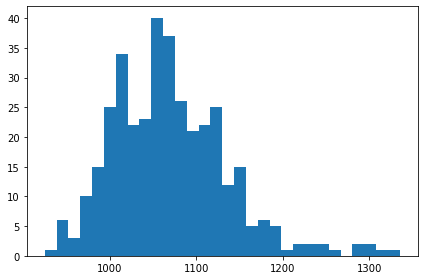

In [20]:
data = pd.read_csv("5000_Women_Results.csv")
d = data['Fr_PR']
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)
axs.hist(d, bins=30)

(array([22., 82., 87., 83., 45., 19., 10.,  5.,  6.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  3.,  2.,  2.]),
 array([ 912.05      ,  953.67166667,  995.29333333, 1036.915     ,
        1078.53666667, 1120.15833333, 1161.78      , 1203.40166667,
        1245.02333333, 1286.645     , 1328.26666667, 1369.88833333,
        1411.51      , 1453.13166667, 1494.75333333, 1536.375     ,
        1577.99666667, 1619.61833333, 1661.24      , 1702.86166667,
        1744.48333333, 1786.105     , 1827.72666667, 1869.34833333,
        1910.97      , 1952.59166667, 1994.21333333, 2035.835     ,
        2077.45666667, 2119.07833333, 2160.7       ]),
 <BarContainer object of 30 artists>)

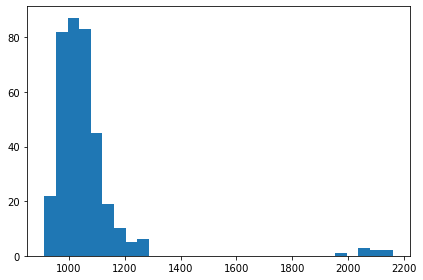

In [21]:
data = pd.read_csv("5000_Women_Results.csv")
d = data['Sr_PR']
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)
axs.hist(d, bins=30)

(array([ 1.,  6.,  3., 11., 19., 21., 24., 22., 35., 25., 39., 23., 27.,
        29., 25.,  9., 18., 16.,  6.,  5.,  5.,  3.,  2.,  0.,  0.,  0.,
         0.,  1.,  0.,  1.]),
 array([ 798.71      ,  808.02566667,  817.34133333,  826.657     ,
         835.97266667,  845.28833333,  854.604     ,  863.91966667,
         873.23533333,  882.551     ,  891.86666667,  901.18233333,
         910.498     ,  919.81366667,  929.12933333,  938.445     ,
         947.76066667,  957.07633333,  966.392     ,  975.70766667,
         985.02333333,  994.339     , 1003.65466667, 1012.97033333,
        1022.286     , 1031.60166667, 1040.91733333, 1050.233     ,
        1059.54866667, 1068.86433333, 1078.18      ]),
 <BarContainer object of 30 artists>)

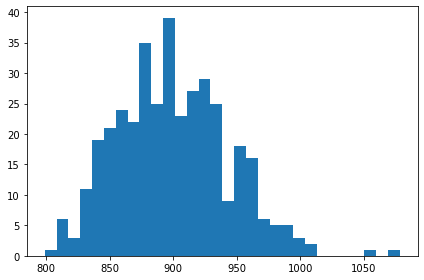

In [22]:
data = pd.read_csv("5000_Men_Results.csv")
d = data['Fr_PR']
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)
axs.hist(d, bins=30)

(array([ 6.,  9., 15., 25., 16., 30., 24., 18., 23., 27., 30., 24., 23.,
        17., 23., 22.,  7.,  9.,  5.,  6.,  5.,  3.,  1.,  4.,  1.,  0.,
         1.,  0.,  0.,  2.]),
 array([ 795.33,  803.81,  812.29,  820.77,  829.25,  837.73,  846.21,
         854.69,  863.17,  871.65,  880.13,  888.61,  897.09,  905.57,
         914.05,  922.53,  931.01,  939.49,  947.97,  956.45,  964.93,
         973.41,  981.89,  990.37,  998.85, 1007.33, 1015.81, 1024.29,
        1032.77, 1041.25, 1049.73]),
 <BarContainer object of 30 artists>)

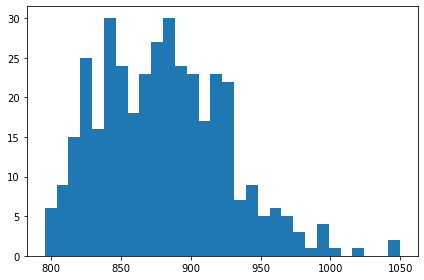

In [23]:
data = pd.read_csv("5000_Men_Results.csv")
d = data['Sr_PR']
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)
axs.hist(d, bins=30)

(array([  3.,  14.,  74., 165.,  97.,   4.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   3.,   2.,   0.,   1.]),
 array([ 2.29      ,  2.67269444,  3.05538889,  3.43808333,  3.82077778,
         4.20347222,  4.58616667,  4.96886111,  5.35155556,  5.73425   ,
         6.11694444,  6.49963889,  6.88233333,  7.26502778,  7.64772222,
         8.03041667,  8.41311111,  8.79580556,  9.1785    ,  9.56119444,
         9.94388889, 10.32658333, 10.70927778, 11.09197222, 11.47466667,
        11.85736111, 12.24005556, 12.62275   , 13.00544444, 13.38813889,
        13.77083333]),
 <BarContainer object of 30 artists>)

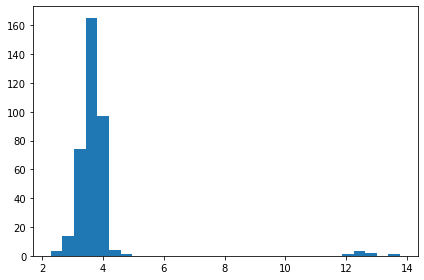

In [24]:
data = pd.read_csv("PV_Women_Results.csv")
d = data['Fr_PR']
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)
axs.hist(d, bins=30)

(array([  8.,  50., 156., 115.,  26.,   3.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   3.,   1.,   1.,   2.]),
 array([ 2.75   ,  3.14375,  3.5375 ,  3.93125,  4.325  ,  4.71875,
         5.1125 ,  5.50625,  5.9    ,  6.29375,  6.6875 ,  7.08125,
         7.475  ,  7.86875,  8.2625 ,  8.65625,  9.05   ,  9.44375,
         9.8375 , 10.23125, 10.625  , 11.01875, 11.4125 , 11.80625,
        12.2    , 12.59375, 12.9875 , 13.38125, 13.775  , 14.16875,
        14.5625 ]),
 <BarContainer object of 30 artists>)

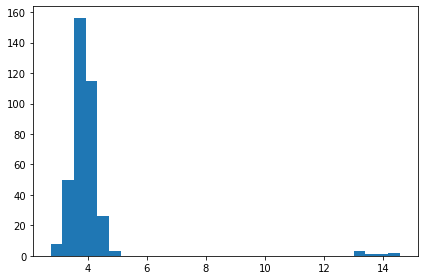

In [25]:
data = pd.read_csv("PV_Women_Results.csv")
d = data['Sr_PR']
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)
axs.hist(d, bins=30)

(array([  8.,  11.,  66., 124.,  80.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   1.,   0.,   1.,   0.,   1.,   1.]),
 array([ 2.89      ,  3.41936111,  3.94872222,  4.47808333,  5.00744444,
         5.53680556,  6.06616667,  6.59552778,  7.12488889,  7.65425   ,
         8.18361111,  8.71297222,  9.24233333,  9.77169444, 10.30105556,
        10.83041667, 11.35977778, 11.88913889, 12.4185    , 12.94786111,
        13.47722222, 14.00658333, 14.53594444, 15.06530556, 15.59466667,
        16.12402778, 16.65338889, 17.18275   , 17.71211111, 18.24147222,
        18.77083333]),
 <BarContainer object of 30 artists>)

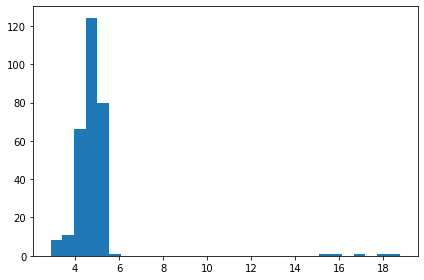

In [26]:
data = pd.read_csv("PV_Men_Results.csv")
d = data['Fr_PR']
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)
axs.hist(d, bins=30)

(array([  5.,  25.,  92., 134.,  34.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   1.,   1.,   2.]),
 array([ 3.35      ,  3.85638889,  4.36277778,  4.86916667,  5.37555556,
         5.88194444,  6.38833333,  6.89472222,  7.40111111,  7.9075    ,
         8.41388889,  8.92027778,  9.42666667,  9.93305556, 10.43944444,
        10.94583333, 11.45222222, 11.95861111, 12.465     , 12.97138889,
        13.47777778, 13.98416667, 14.49055556, 14.99694444, 15.50333333,
        16.00972222, 16.51611111, 17.0225    , 17.52888889, 18.03527778,
        18.54166667]),
 <BarContainer object of 30 artists>)

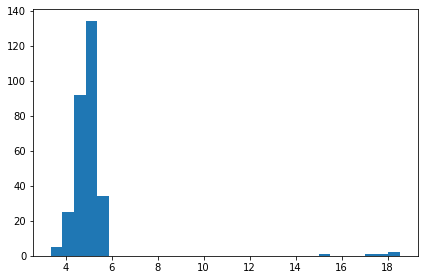

In [27]:
data = pd.read_csv("PV_Men_Results.csv")
d = data['Sr_PR']
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)
axs.hist(d, bins=30)

(array([ 42., 152., 112.,  14.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([10.04      , 11.01991667, 11.99983333, 12.97975   , 13.95966667,
        14.93958333, 15.9195    , 16.89941667, 17.87933333, 18.85925   ,
        19.83916667, 20.81908333, 21.799     , 22.77891667, 23.75883333,
        24.73875   , 25.71866667, 26.69858333, 27.6785    , 28.65841667,
        29.63833333, 30.61825   , 31.59816667, 32.57808333, 33.558     ,
        34.53791667, 35.51783333, 36.49775   , 37.47766667, 38.45758333,
        39.4375    ]),
 <BarContainer object of 30 artists>)

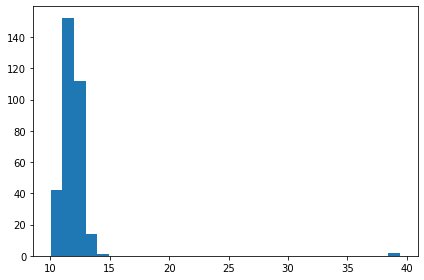

In [28]:
data = pd.read_csv("TJ_Women_Results.csv")
d = data['Fr_PR']
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)
axs.hist(d, bins=30)

(array([ 20., 110., 138.,  49.,   4.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([10.09      , 11.09116667, 12.09233333, 13.0935    , 14.09466667,
        15.09583333, 16.097     , 17.09816667, 18.09933333, 19.1005    ,
        20.10166667, 21.10283333, 22.104     , 23.10516667, 24.10633333,
        25.1075    , 26.10866667, 27.10983333, 28.111     , 29.11216667,
        30.11333333, 31.1145    , 32.11566667, 33.11683333, 34.118     ,
        35.11916667, 36.12033333, 37.1215    , 38.12266667, 39.12383333,
        40.125     ]),
 <BarContainer object of 30 artists>)

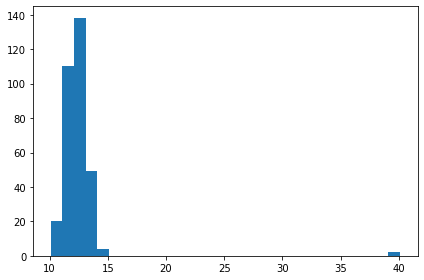

In [29]:
data = pd.read_csv("TJ_Women_Results.csv")
d = data['Sr_PR']
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)
axs.hist(d, bins=30)

(array([ 25., 132.,  57.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   2.]),
 array([12.29      , 13.69144444, 15.09288889, 16.49433333, 17.89577778,
        19.29722222, 20.69866667, 22.10011111, 23.50155556, 24.903     ,
        26.30444444, 27.70588889, 29.10733333, 30.50877778, 31.91022222,
        33.31166667, 34.71311111, 36.11455556, 37.516     , 38.91744444,
        40.31888889, 41.72033333, 43.12177778, 44.52322222, 45.92466667,
        47.32611111, 48.72755556, 50.129     , 51.53044444, 52.93188889,
        54.33333333]),
 <BarContainer object of 30 artists>)

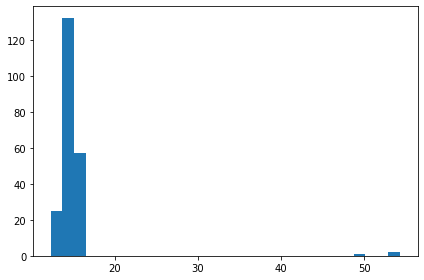

In [30]:
data = pd.read_csv("TJ_Men_Results.csv")
d = data['Fr_PR']
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)
axs.hist(d, bins=30)

(array([ 26., 129.,  54.,   5.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   2.]),
 array([12.72      , 14.14669444, 15.57338889, 17.00008333, 18.42677778,
        19.85347222, 21.28016667, 22.70686111, 24.13355556, 25.56025   ,
        26.98694444, 28.41363889, 29.84033333, 31.26702778, 32.69372222,
        34.12041667, 35.54711111, 36.97380556, 38.4005    , 39.82719444,
        41.25388889, 42.68058333, 44.10727778, 45.53397222, 46.96066667,
        48.38736111, 49.81405556, 51.24075   , 52.66744444, 54.09413889,
        55.52083333]),
 <BarContainer object of 30 artists>)

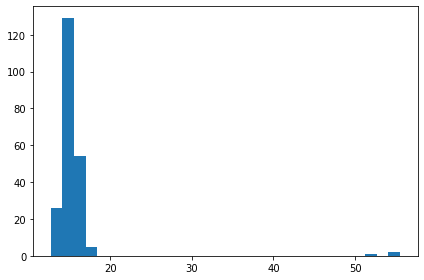

In [31]:
data = pd.read_csv("TJ_Men_Results.csv")
d = data['Sr_PR']
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)
axs.hist(d, bins=30)